### Задание

Создайте сверточную нейронную сеть, распознающую рукописные цифры.
Используйте следующие параметры модели:
  * Параметры модели: сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.
  * Гиперпараметры обучения: функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.
В конце выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

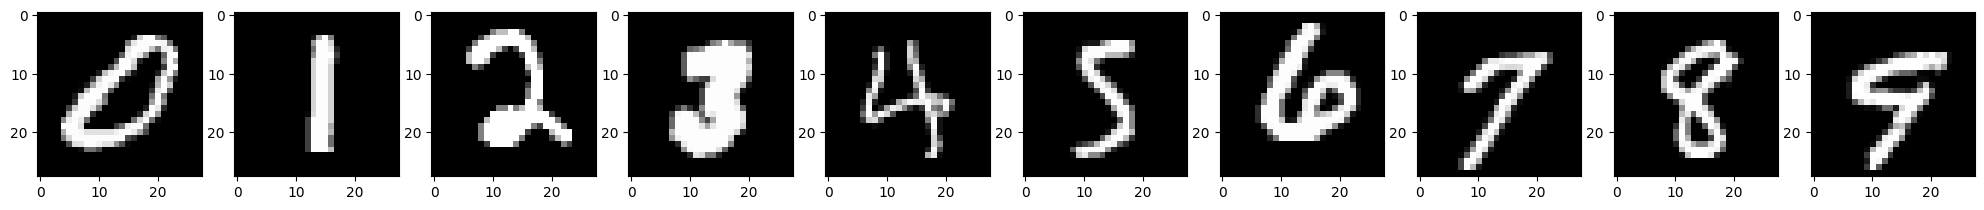

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [ ]:
# Нормализуем данные

x_train = x_train/255.
x_test = x_test/255.

In [ ]:
# Подключение нужных слоев из модуля tensorflow.keras.layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

In [ ]:
CLASS_COUNT = 10

# Создание модели последовательной архитектуры

model = Sequential()

In [ ]:
# Первый сверточный блок
model.add(Conv2D(8, (3, 3), name='First_C', padding='same', activation='relu', input_shape=(25, 25, 1)))
model.add(BatchNormalization(name='First_B'))
model.add(Dropout(0.2, name='First_D'))

# Второй сверточный блок
model.add(Conv2D(16, (3, 3), name='Two_C', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), name='Two_M'))

# Блок классификации
model.add(Flatten(name='Class_1'))
model.add(Dense(128, activation='relu', name='Class_2'))
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_3'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ First_C (Conv2D)                     │ (None, 25, 25, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ First_B (BatchNormalization)         │ (None, 25, 25, 8)           │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ First_D (Dropout)                    │ (None, 25, 25, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Two_C (Conv2D)                       │ (None, 25, 25, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Two_M (MaxPooling2D)                 │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Class_1 (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Class_2 (Dense)                      │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Class_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,898 (210.54 KB)

 Trainable params: 53,882 (210.48 KB)

 Non-trainable params: 16 (64.00 B)

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_learning = model.fit(x_train,
                           y_train,
                           validation_split=0.2,
                           batch_size=128,
                           epochs=15,
                           verbose=1)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.7839 - loss: 0.6956 - val_accuracy: 0.9556 - val_loss: 0.3027
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 123ms/step - accuracy: 0.9629 - loss: 0.1201 - val_accuracy: 0.9778 - val_loss: 0.0721
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.9756 - loss: 0.0762 - val_accuracy: 0.9823 - val_loss: 0.0541
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.9798 - loss: 0.0586 - val_accuracy: 0.9851 - val_loss: 0.0493
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 123ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9856 - val_loss: 0.0453
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.9858 - loss: 0.0421 - val_accuracy: 0.9879 - val_loss: 0.0441
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.9870 - loss: 0.0394 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.9894 - loss: 0

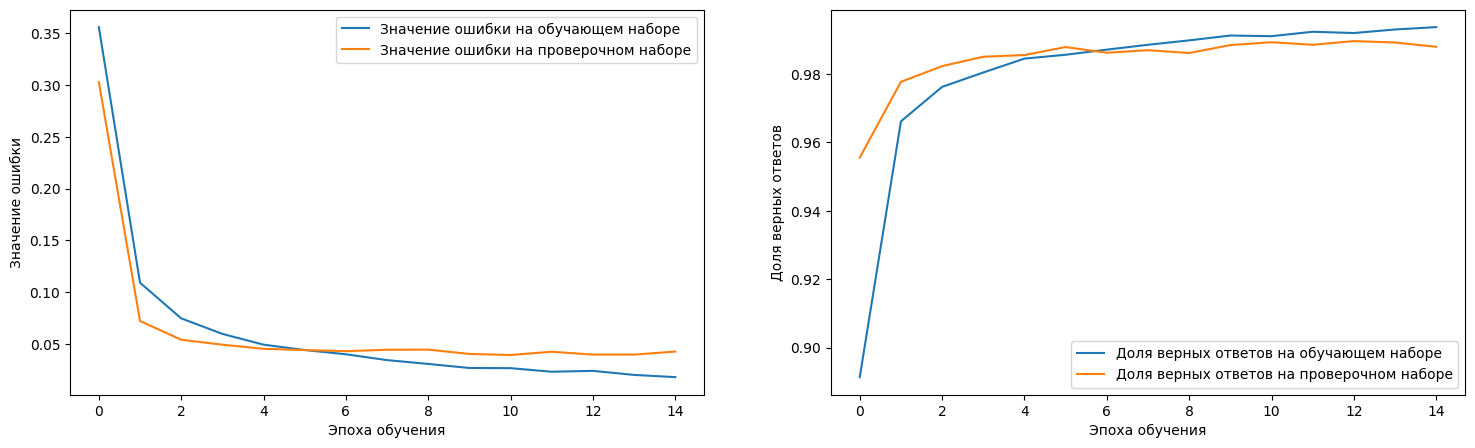

In [ ]:
# Построим графики значений ошибки и верных ответов

plt.figure(1, figsize=(18, 5))

plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(model_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(model_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()


plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(model_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(model_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.show()

In [ ]:
# Проверка на тестовых данных

scores = model.evaluate(x_test,
                        y_test,
                        verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9835 - loss: 0.0506


В конце пографикам ответов на тестовом наборе видно небольшие переобучение.
Необходимо или уменьшить количество эпох до 12-ти, или наоборот увеличить и по результатам делать выводы.